# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [2]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

In [4]:
spam = df.loc[df['Prediction'] == 1]
not_spam = df.loc[df['Prediction'] == 0]

In [5]:
spam

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
16,Email 17,3,1,2,2,0,1,17,0,0,...,0,0,0,0,0,0,0,1,0,1
17,Email 18,36,21,6,14,7,17,194,25,5,...,0,0,0,0,0,0,0,3,0,1
25,Email 26,12,53,2,14,18,14,287,0,2,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
import matplotlib.pyplot as plt

# Find the top 5 most common words in spam emails
spam_word_counts = spam.iloc[:, 1:].sum()
top_5_spam_words = spam_word_counts.sort_values(ascending=False).head(5)

# Find the top 5 most common words in non-spam emails
non_spam_word_counts = not_spam.iloc[:, 1:].sum()
top_5_non_spam_words = non_spam_word_counts.sort_values(ascending=False).head(5)

# Print the results
print('Top 5 most common words in spam emails:')
print(top_5_spam_words)
print('Top 5 most common words in non-spam emails:')
print(top_5_non_spam_words)

Top 5 most common words in spam emails:
e    151062
t    109878
a    105425
o    103997
i    100761
dtype: int64
Top 5 most common words in non-spam emails:
e    287499
t    202913
a    181711
o    180973
n    157937
dtype: int64


## Figuring out some comparatively more important features

In [9]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 

# One way to do this is by using feature selection techniques to identify the most important features in the dataset.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y=df['Prediction']
x=df.drop(['Prediction','Email No.'], axis=1)

# Apply the Chi-Squared test to select the top 2 features
X_new = SelectKBest(chi2, k=2).fit_transform(x, y)

## Train - Test Split

In [10]:
# Create trianing and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Making Predictions using Multinomial NB Classifier

In [11]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

Accuracy: 0.9449275362318841


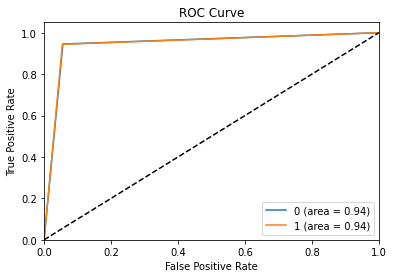

In [12]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
unique_target=df['Prediction'].unique()

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(unique_target.size):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
for i in range(unique_target.size):
    plt.plot(fpr[i], tpr[i], label=f'{unique_target[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Plot the confusion Matrix

In [15]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['Ham', 'Spam']

# Print the confusion matrix
print('Confusion Matrix:')
print(f'{"":<7} {"Predicted":^11}')
print(f'{"":<7} {class_labels[0]:^5} {class_labels[1]:^5}')
for i in range(len(class_labels)):
    print(f'{class_labels[i]:<7} {cm[i][0]:^5} {cm[i][1]:^5}')

Confusion Matrix:
         Predicted 
         Ham  Spam 
Ham      727   23  
Spam     189   96  


## Trying out with SVMs

Accuracy: 0.7951690821256039


<Axes: >

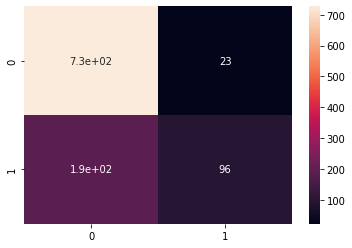

In [14]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Create a Support Vector Classifier
clf = SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True)

## Comparing the models

In [13]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

# In general, the performance of a model can depend on many factors such as the characteristics of the data, 
# The choice of hyperparameters, and the evaluation metric used, distribution of the features or the presence of class imbalance.


# Multinomial Naive Bayes classifier model performed better in terms of accuracy.

## Bonus Question

In [14]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [20]:
import pandas as pd
from collections import Counter

# Define the input string
s = "I am a Python developer and currently working on a project to classify mails"

# Split the string into words
words = s.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a DataFrame from the word counts
df = pd.DataFrame([word_counts])

# Print the resulting DataFrame
print(df)

   I  am  a  Python  developer  and  currently  working  on  project  to  \
0  1   1  2       1          1    1          1        1   1        1   1   

   classify  mails  
0         1      1  
